In [ ]:
import shutil
zippath="/content/image_classificattion (2).zip"
shutil.unpack_archive(zippath, "/content/image_classificattion")

In [ ]:
zippath1="/content/haarcascades.zip"
shutil.unpack_archive(zippath1, "/content/opencv1")

In [ ]:
import shutil
zipath1="/content/image_classification_cropped.zip"
shutil.unpack_archive(zipath1,"/content/croppedddd")

In [ ]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
img=cv2.imread("/content/image_classificattion/image_classificattion/shreyas/sreyas (1).jpeg")
img.shape

(225, 225, 3)

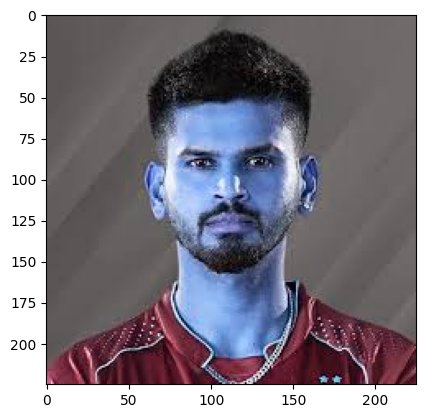

In [ ]:
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

array([[ 85,  85,  86, ..., 107, 107, 107],
       [ 85,  85,  86, ..., 107, 107, 107],
       [ 85,  85,  86, ..., 107, 107, 107],
       ...,
       [122, 118, 126, ...,  28,  29,  37],
       [140, 123, 137, ...,  24,  33,  43],
       [140, 118, 117, ...,  43,  42,  52]], dtype=uint8)
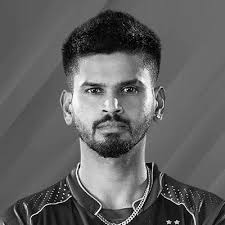

In [ ]:
gray

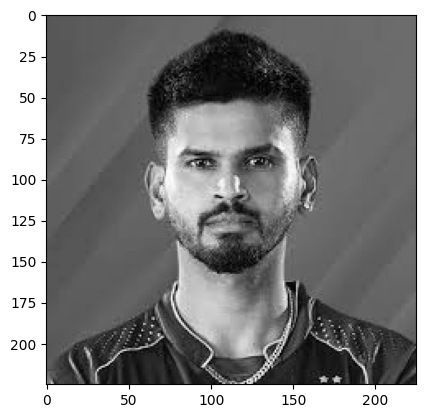

In [ ]:
plt.imshow(gray,cmap="gray")

In [ ]:
face_cascade=cv2.CascadeClassifier("/content/opencv1/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("/content/opencv1/haarcascades/haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 61,  52, 103, 103]], dtype=int32)

In [ ]:
(x,y,w,h)=faces[0]
x,y,w,h


(np.int32(61), np.int32(52), np.int32(103), np.int32(103))

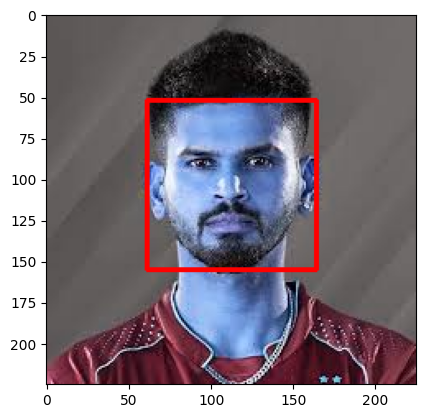

In [ ]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

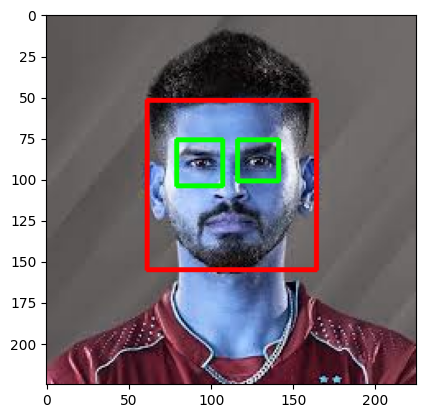

In [ ]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=gray[y:y+h, x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eyes=eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  plt.figure()
  plt.imshow(face_img,cmap="gray")
  plt.show()

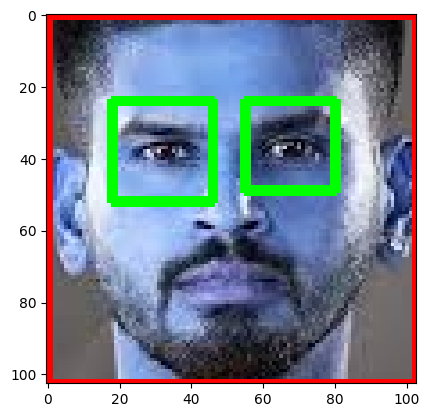

In [ ]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


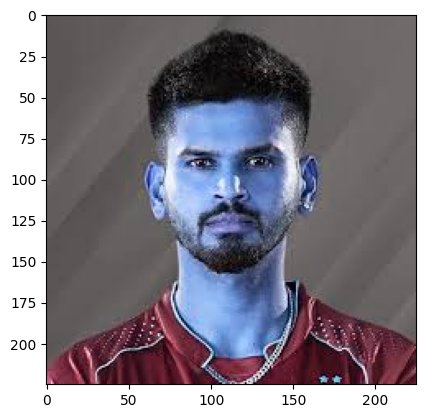

In [ ]:

original_image = cv2.imread('/content/image_classificattion/image_classificattion/shreyas/sreyas (1).jpeg')
plt.imshow(original_image)


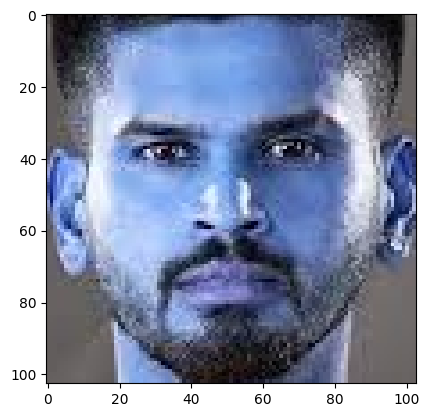

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/image_classificattion/image_classificattion/shreyas/sreyas (1).jpeg')
plt.imshow(cropped_image)


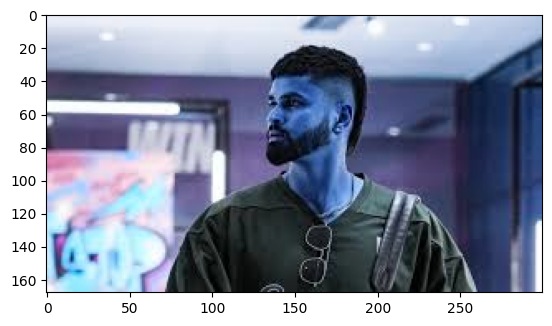

In [ ]:
org_image_obstructed = cv2.imread('/content/image_classificattion/image_classificattion/shreyas/sreyas (21).jpeg')
plt.imshow(org_image_obstructed)


In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/image_classificattion/image_classificattion/shreyas/sreyas (21).jpeg')
cropped_image_no_2_eyes


In [ ]:
path_to_data="/content/image_classificattion/image_classificattion"
path_to_cropped="/content/cropped"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [ ]:

img_dirs

['/content/image_classificattion/image_classificattion/pant',
 '/content/image_classificattion/image_classificattion/rabada',
 '/content/image_classificattion/image_classificattion/shreyas',
 '/content/image_classificattion/image_classificattion/arshadeep']

In [ ]:

import shutil
if os.path.exists(path_to_cropped):
     shutil.rmtree(path_to_cropped)
os.mkdir(path_to_cropped)


In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



pant
Generating cropped images in folder:  /content/croppedpant
rabada
Generating cropped images in folder:  /content/croppedrabada
shreyas
Generating cropped images in folder:  /content/croppedshreyas
arshadeep
Generating cropped images in folder:  /content/croppedarshadeep


In [ ]:
unzip_folder="/content/croppedshreyas"
zipfolderarsh="/content/shreyas"
shutil.make_archive(zipfolderarsh,"zip",unzip_folder)

'/content/shreyas.zip'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
# Image dimensions
IMG_SIZE = 224
BATCH_SIZE = 4

# Advanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/croppedddd/image_classification_cropped',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/croppedddd/image_classification_cropped',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 20 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [ ]:
# Load pre-trained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=output)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 863ms/step - accuracy: 0.1389 - loss: 1.9113 - val_accuracy: 0.0000e+00 - val_loss: 1.7095
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1028 - loss: 2.3764 - val_accuracy: 0.0000e+00 - val_loss: 2.0014
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.0618 - loss: 1.8097 - val_accuracy: 0.2500 - val_loss: 1.6527
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.1632 - loss: 1.9897 - val_accuracy: 0.2500 - val_loss: 1.3552
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3806 - loss: 1.4974 - val_accuracy: 0.0000e+00 - val_loss: 1.8628
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1778 - loss: 2.1878 - val_accuracy: 0.0000e+00 - val_loss: 1.8009
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2847 - loss: 1.3612 - val_accuracy: 0.5000 - val_loss: 1.5013
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1465 - loss: 1.6690 - val_accuracy: 0.2500 - v

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/croppedddd/image_classification_cropped/shreyas/shreyas1.png'
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())

print("Predicted Class:", class_labels[class_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: shreyas
